In [26]:
from project_functions_final_plots import *
import pandas as pd
import geopandas as gpd
import numpy as np
import os 
from pathlib import Path  
import matplotlib.pyplot as plt

# Variable Assignments

In [27]:
clienttoken = "MLY|6271859919532158|486bcdece7a665eb89a5803f2994b4c9"
bounds = [(12.436781, 55.545432), (12.436781, 55.731815), (12.696966, 55.731815), (12.696966, 55.545432)]
my_shapefile_path = "koebenhavn.shp"
my_shp = gpd.read_file(my_shapefile_path)

In [28]:
ids_file = pd.read_csv('ids.csv')
IDs =  ids_file['image_id'].to_list()
np.random.seed(42)
IDs = list(np.random.choice(IDs, 100))

In [30]:
strava_csv = pd.read_csv("/home/s204124/7f42d69dd7bd00b04081b9cbd0d05ab4e5f87353dcd7364c34b8e7c74d42109d-1676891223740.csv")
df_activity = StravaToDF(my_shp, bounds, strava_csv)

# Create dataset

### Get Detections for Mapillary

In [31]:
#df_detections, unique_occurences, dict_image = GetDetections(IDs, clienttoken, data_type = 'int')
df_detections1, dict_image = GetDetections_FaF(IDs, clienttoken, data_type = 'int')

Loading…: 100%|██████████████████████████| 100/100 [00:24<00:00,  4.14it/s]


### Export Detections Dataframe

In [32]:
current_path = os.getcwd()
filepath = Path(current_path+'/detections1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_detections1.to_csv(filepath) 

# Plots


Loading…: 100%|██████████████████████████| 100/100 [00:08<00:00, 11.35it/s]
/home/s204124/project_functions_final_plots.py:89: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_lines["geometry"].buffer(buffer_size, cap_style = 2).plot(ax=ax,alpha=0.5)   #With Buffer
/home/s204124/project_functions_final_plots.py:103: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_polygons["geometry"] = df_polygons["geometry"].buffer(buffer, cap_style = 2)
/home/s204124/project_functions_final_plots.py:112: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_lines["geometry"].buffer(0.0001, cap_s

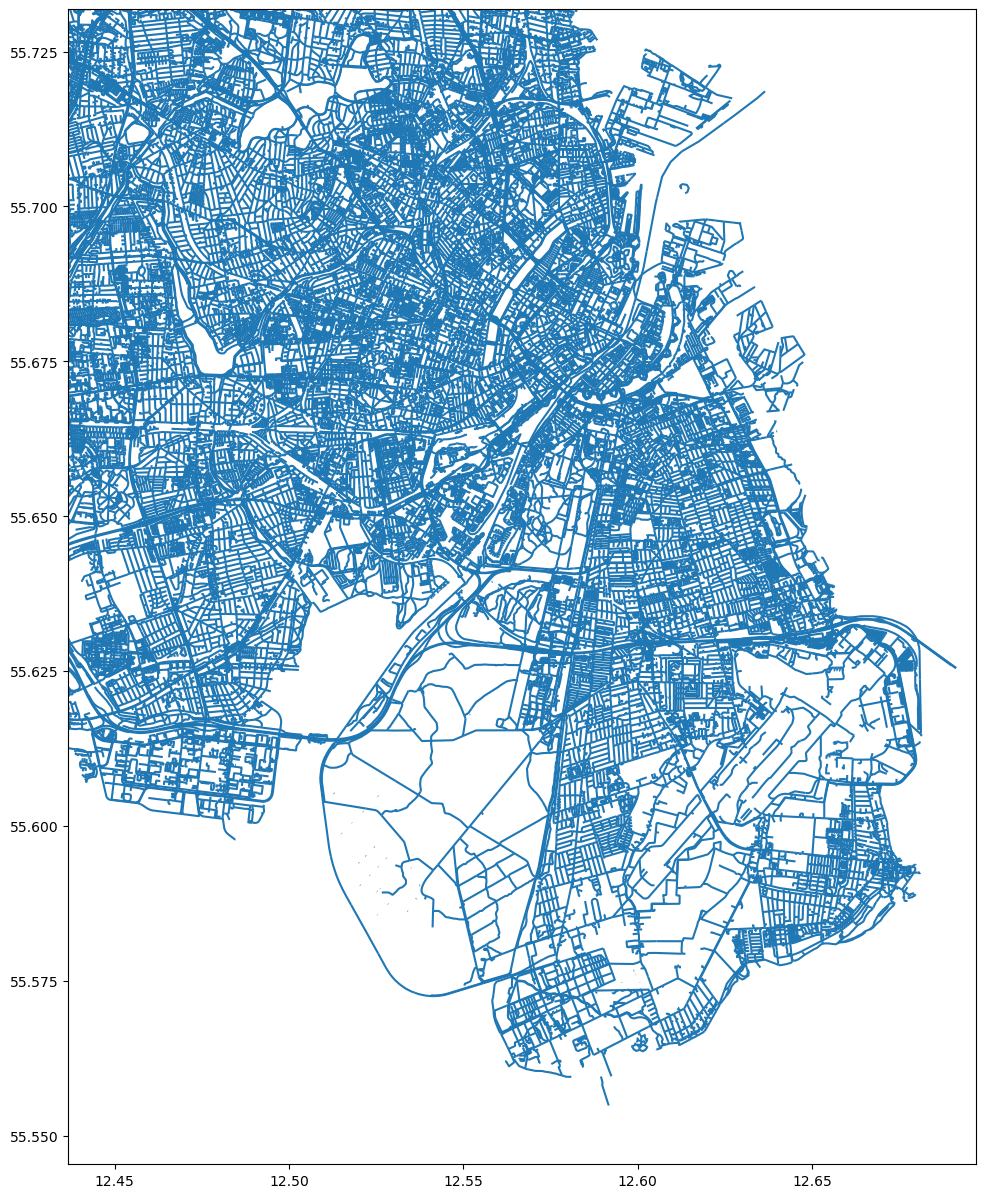

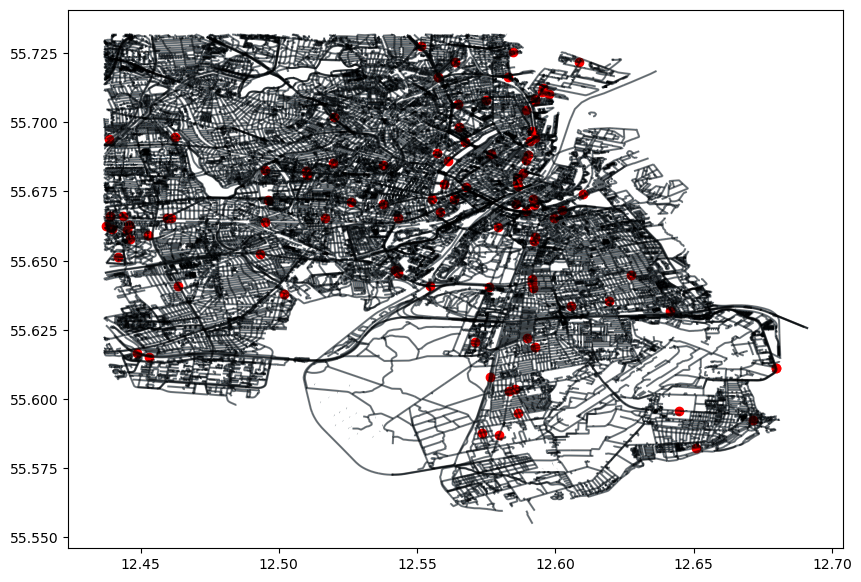

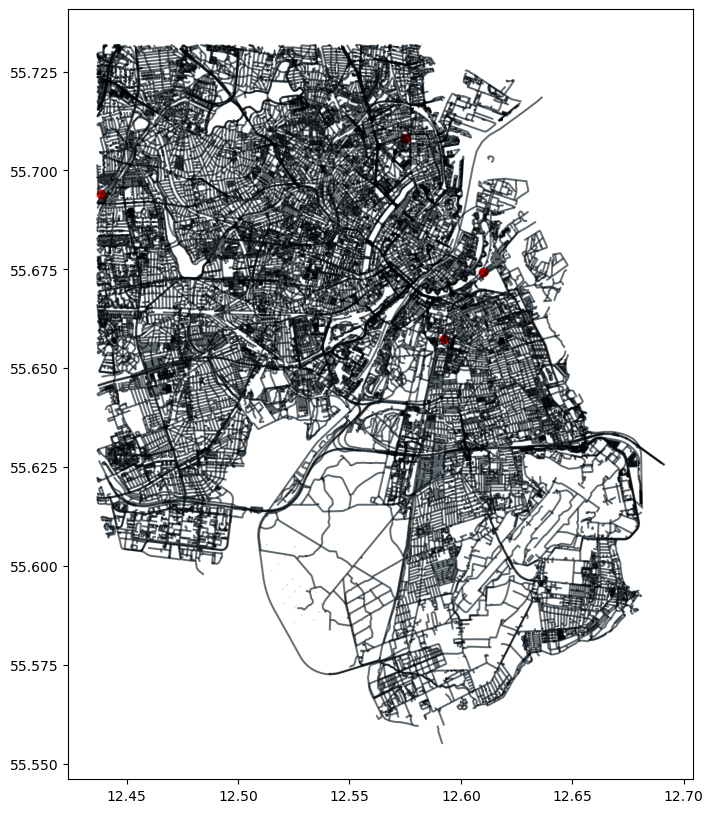

In [37]:
points=GetIdAndGeometry(IDs, clienttoken)
PlotShapefile(my_shp, bounds)
PlotAssignedImages(my_shp, bounds, clienttoken, IDs,points, buffer_size = 0.0001)
PlotUnassignedPoints(my_shp, clienttoken, bounds, points, IDs)
#PlotFractionImages(unique_occurences)
#PlotAvgDetection(dict_image)

In [ ]:
print(df_activity['Activity'])
plt.hist(np.log(df_activity['Activity']), bins=100)

plt.show()

In [ ]:
plt.hist(df_activity['Activity'], bins=1000)
plt.show()